### Importação dos dados



Conclusões

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_palette("Set1")  # Escolhe a paleta de cores

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [36]:
# Explorando a estrutura dos DataFrames
print('LINHAS:')
print(f'  loja1: {loja.shape[0]} \n  loja2: {loja2.shape[0]} \n  loja3: {loja3.shape[0]} \n  loja4: {loja4.shape[0]}\n')

print('COLUNAS:')
for coluna in loja.columns:
    print('  ', coluna)

LINHAS:
  loja1: 2359 
  loja2: 2359 
  loja3: 2359 
  loja4: 2358

COLUNAS:
   Produto
   Categoria do Produto
   Preço
   Frete
   Data da Compra
   Vendedor
   Local da compra
   Avaliação da compra
   Tipo de pagamento
   Quantidade de parcelas
   lat
   lon


In [37]:
# Adicionando o nome da loja em cada DataFrame
loja['loja'] = 1
loja2['loja'] = 2
loja3['loja'] = 3
loja4['loja'] = 4

# Concatenando os DataFrames em um único DataFrame
df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
df.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,1
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,1
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,1
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,1
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,1


In [38]:
# identificando os tipos de dados e dados nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria do Produto    9435 non-null   object 
 2   Preço                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliação da compra     9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  loja                    9435 non-null   int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 958.4+ KB


In [39]:
# Estatísticas descritivas dos dados
df.describe(include='all')

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
count,9435,9435,9435.00,9435.00,9435,9435,9435,9435.00,9435,9435.00,9435.00,9435.00,9435.00
unique,51,8,NaN,NaN,1185,14,27,NaN,4,NaN,NaN,NaN,NaN
top,Cômoda,moveis,NaN,NaN,06/02/2020,Thiago Silva,SP,NaN,cartao_credito,NaN,NaN,NaN,NaN
freq,210,1886,NaN,NaN,18,744,3943,NaN,6898,NaN,NaN,NaN,NaN
mean,NaN,NaN,622.31,33.17,NaN,NaN,NaN,4.01,NaN,2.93,-20.53,-47.17,2.50
std,NaN,NaN,787.09,41.97,NaN,NaN,NaN,1.39,NaN,2.80,5.40,4.18,1.12
min,NaN,NaN,10.07,0.00,NaN,NaN,NaN,1.00,NaN,1.00,-30.17,-70.55,1.00
25%,NaN,NaN,73.61,4.01,NaN,NaN,NaN,3.00,NaN,1.00,-22.25,-48.79,1.50
50%,NaN,NaN,295.35,15.65,NaN,NaN,NaN,5.00,NaN,1.00,-22.19,-48.79,2.00
75%,NaN,NaN,884.40,46.59,NaN,NaN,NaN,5.00,NaN,4.00,-18.10,-44.38,3.00


In [40]:
fontsize_titulo = 14
fontsize_eixos = 12

# Definindo a paleta de cores para as lojas
# cores_paleta_lojas = ['#EED7D3', '#C89BA3', '#9E6B82', '#3B2A3E']
cores_paleta_lojas = ['#1b9e77', '#d95f02', '#7570b3', '#0173b2']

categorias_unicas = df['Categoria do Produto'].unique()

cores_paleta = plt.cm.Pastel1(np.linspace(0, 1, len(categorias_unicas)))
cor_categoria = {categoria: cores_paleta[idx] for idx, categoria in enumerate(categorias_unicas)}

num_lojas = len(df['loja'].unique())

# 1. Análise Faturamento

In [47]:
df_aux = df.copy()
df_aux['Data da Compra'] = pd.to_datetime(df_aux['Data da Compra'], format='%d/%m/%Y')
df_aux['Mes_Ano'] = df_aux['Data da Compra'].dt.to_period('M') 
df_aux['Ano'] = df_aux['Data da Compra'].dt.to_period('Y') 

df_group_fat = df.groupby('loja').agg(sum_preco = ("Preço",'sum')).reset_index()
df_group_fat

,loja,sum_preco
0,1,1534509.12
1,2,1488459.06
2,3,1464025.03
3,4,1384497.58


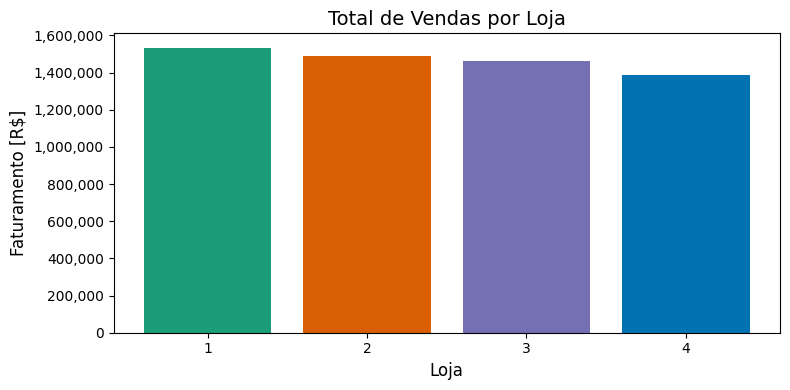

In [42]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.arange(len(df_group_fat))  
bars = ax.bar(x, df_group_fat['sum_preco'], color=cores_paleta_lojas)

ax.set_title('Total de Vendas por Loja', fontsize=fontsize_titulo)
ax.set_xlabel('Loja', fontsize=fontsize_eixos)
ax.set_ylabel('Faturamento [R$]', fontsize=fontsize_eixos)

ax.set_xticks(x) 
ax.set_xticklabels(df_group_fat['loja'], fontsize=10)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))  # Sem notação científica

plt.tight_layout()
plt.show()

   Loja  Correlação
0     1        0.50
1     2        0.52
2     3        0.47
3     4        0.48


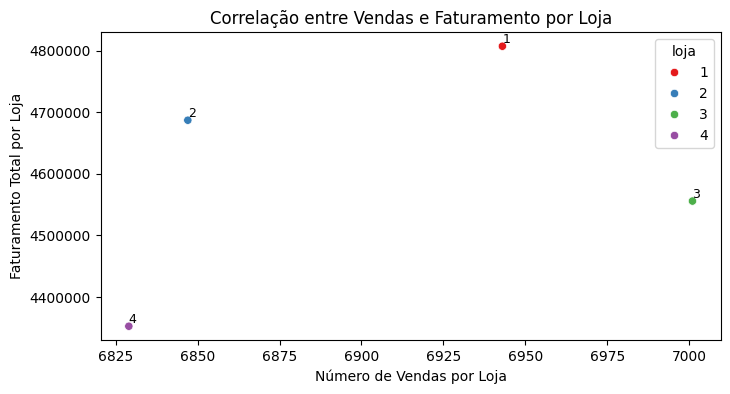

In [43]:
df_aux1 = df.copy()

df_aux1["Faturamento_Total"] = (df_aux1["Preço"] + df_aux1["Frete"]) * df_aux1["Quantidade de parcelas"]

correlacao_por_loja = df_aux1.groupby("loja").apply(lambda x: x[["Quantidade de parcelas", "Faturamento_Total"]].corr().iloc[0, 1])
correlacao_por_loja = correlacao_por_loja.reset_index()
correlacao_por_loja.columns = ["Loja", "Correlação"]
print(correlacao_por_loja)


plt.figure(figsize=(8,4))
sns.scatterplot(x=df_loja["Numero_Vendas"], y=df_loja["Faturamento_Total"], hue=df_loja["loja"], palette="Set1")
plt.xlabel("Número de Vendas por Loja")
plt.ylabel("Faturamento Total por Loja")
plt.title("Correlação entre Vendas e Faturamento por Loja")

# Adiciona rótulos com o nome da loja
for i, row in df_loja.iterrows():
    plt.text(row["Numero_Vendas"], row["Faturamento_Total"], int(row["loja"]), fontsize=9, verticalalignment='bottom')

plt.ticklabel_format(style='plain', axis='y')
plt.show()


OBSERVAÇÕES
- Loja 1 lidera o faturamento total, sendo a mais lucrativa entre as quatro lojas.
- Loja 2 tem um desempenho próximo da Loja 1, sugerindo que ambas podem estar operando em mercados similares ou com estratégias eficazes.
- Loja 3 possui um faturamento intermediário
- Loja 4 tem o menor faturamento, indicando menor volume de vendas ou preço médio dos produtos mais baixo.
- Diferença de estratégia de vendas – Lojas 1 e 2 podem ter melhor marketing, mix de produtos, ou preços competitivos.
- Produtos vendidos – Se a Loja 4 vende itens de menor valor unitário, pode ter menos impacto no faturamento total.

Correlação
- A loja 1 apresenta o maior número de vendas e também o maior faturamento, sugerindo que sua estratégia de vendas está funcionando bem.
- A loja 4, por outro lado, tem o menor número de vendas e faturamento, o que pode indicar menor demanda, problemas na precificação ou estratégias de marketing menos eficazes.
- As lojas 2 e 3 estão em posições intermediárias, com vendas e faturamento alinhados dentro dessa tendência.

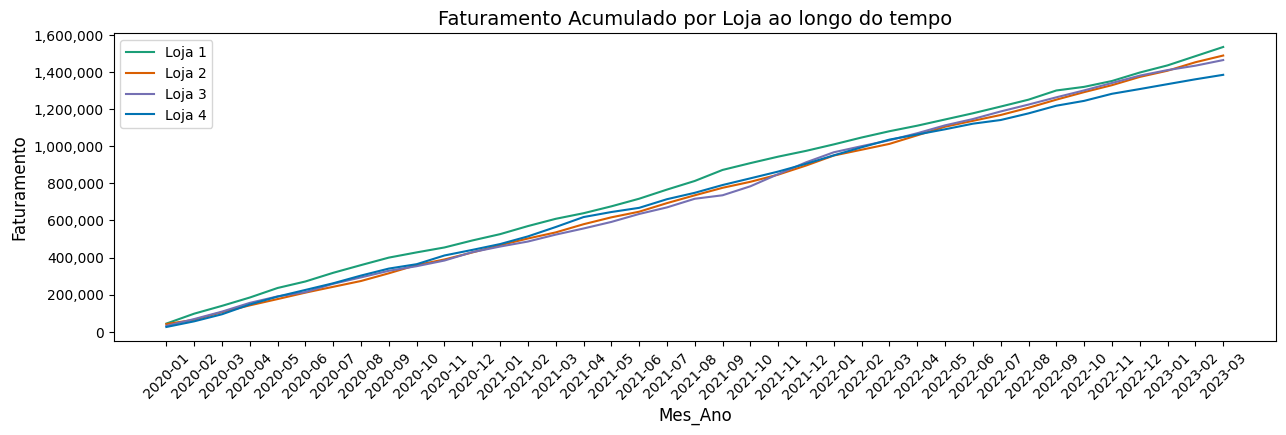

In [48]:
# Agrupar os dados por loja e mês, somando os preços das vendas
df_group_fat_loja = df_aux.groupby(['loja','Mes_Ano']).agg(sum_preco=('Preço','sum')).reset_index()

plt.figure(figsize=(15, 4))

for idx, i in enumerate(df_group_fat_loja['loja'].unique()):
    
    df_1 = df_group_fat_loja[df_group_fat_loja['loja'] == i].copy()
    df_1 = df_1.sort_values('Mes_Ano')

    df_1.set_index('Mes_Ano', inplace=True)

    # Calcular o faturamento acumulado ao longo dos meses
    df_1['CUMSUM'] = df_1['sum_preco'].cumsum()

    plt.plot(df_1.index.astype(str), df_1['CUMSUM'], label=f'Loja {i}', color=cores_paleta_lojas[idx])

plt.title('Faturamento Acumulado por Loja ao longo do tempo', size=fontsize_titulo)
plt.xlabel('Mes_Ano', size=fontsize_eixos)
plt.ylabel('Faturamento', size=fontsize_eixos)
plt.legend() 

plt.xticks(rotation=45) 
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.show()

OBSERVBAVÇÕES
- Crescimento constante: Todas as lojas apresentam um aumento contínuo no faturamento ao longo do período analisado.
- Diferenciação entre lojas: A Loja 1 tem o maior faturamento acumulado, indicando que pode ter um volume de vendas maior ou preços médios mais altos.
- Loja com menor crescimento: A Loja 4 tem o menor faturamento acumulado, o que pode sugerir menor demanda, preços mais baixos ou menos vendas.
- Padrões de crescimento: Algumas lojas apresentam períodos de crescimento mais acelerado, o que pode estar relacionado a promoções, sazonalidade ou mudanças estratégicas.


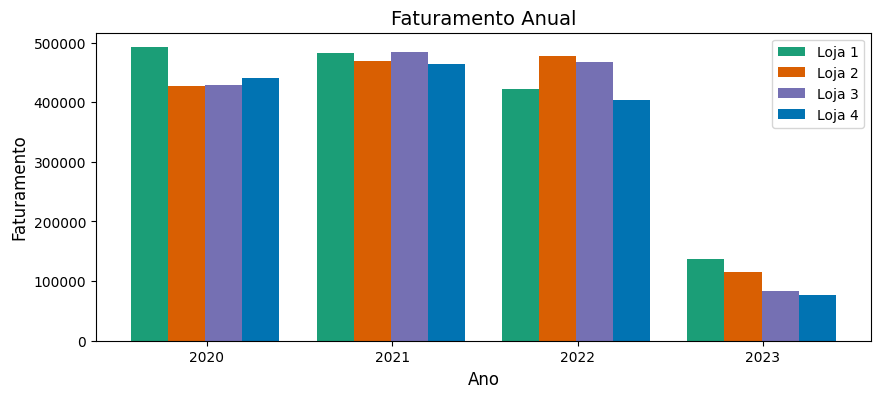

In [49]:
df_group_fat_loja = df_aux.groupby(['loja','Ano']).agg(sum_preco_ano = ('Preço', 'sum')).reset_index()
df_pivot = df_group_fat_loja.pivot(index='Ano', columns='loja', values='sum_preco_ano')

plt.figure(figsize=(10, 4))

anos = df_pivot.index.astype(str)
x = np.arange(len(anos))  # Posições no eixo x

bar_width = 0.2
for idx, loja in enumerate(df_pivot.columns):
    plt.bar(x + idx * bar_width, df_pivot[loja], width=bar_width, label=f'Loja {loja}', color=cores_paleta_lojas[idx])  # Aplicando cores personalizadas

# Ajustando a posição dos rótulos no eixo X para centralizar
plt.xticks(x + bar_width * (len(df_pivot.columns) / 2.6), anos)

plt.title('Faturamento Anual', size=fontsize_titulo)
plt.xlabel('Ano', size=fontsize_eixos)
plt.ylabel('Faturamento', size=fontsize_eixos)
plt.legend()

plt.ticklabel_format(style='plain', axis='y')
plt.show()

OBSERVAÇÕES
- Variação no faturamento ao longo dos anos: Cada loja teve mudanças significativas no faturamento anual, sugerindo possíveis impactos de fatores externos como demanda, estratégias de precificação ou sazonalidade.
- Ano de queda geral: Em 2023, todas as lojas registraram um faturamento menor em comparação com os anos anteriores, o que pode indicar uma desaceleração do mercado ou mudanças na estratégia de vendas.
- A alternância na liderança do faturamento sugere que diferentes lojas tiveram momentos de destaque, possivelmente devido a promoções, mudanças na oferta de produtos ou variações na demanda.
- A queda em 2023 pode ser investigada para entender se foi um impacto do mercado ou uma mudança interna nas lojas.

Destaques por ano:
- 2020: Loja 1 teve o maior faturamento.
- 2021: Loja 3 liderou em faturamento.
- 2022: Loja 2 assumiu a liderança.
- 2023: Apesar da queda geral, Loja 1 manteve o maior faturamento.



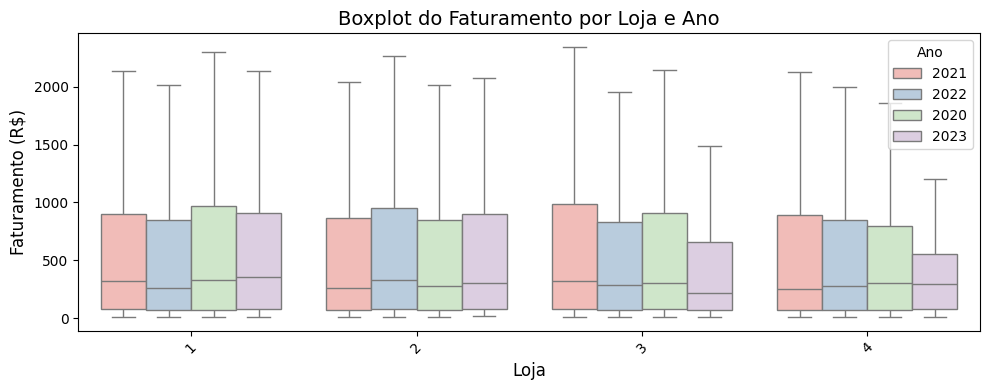

In [ ]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='loja', y='Preço', hue='Ano', data=df_aux, palette='Pastel1',showfliers=False)

plt.title('Boxplot do Faturamento por Loja e Ano', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(rotation=45)

plt.legend(title='Ano')
plt.tight_layout()
plt.show()

In [ ]:
d = df_aux.groupby(['loja','Ano']).agg(sum_preco = ('Preço','sum'), qtd_itens=('Produto','count')).reset_index()

# Calcular a correlação entre faturamento e quantidade de itens vendidos
correlation = d[['sum_preco', 'qtd_itens']].corr()
print(correlation)


           sum_preco  qtd_itens
sum_preco   1.000000   0.988802
qtd_itens   0.988802   1.000000


In [347]:
print('MIN:', df_aux[df_aux['Ano']=='2023']['Data da Compra'].min(), '\nMAX:',df_aux[df_aux['Ano']=='2023']['Data da Compra'].max())

MIN: 2023-01-01 00:00:00 
MAX: 2023-03-31 00:00:00


OBSERVAÇÕES
- O faturamento das lojas variou significativamente ao longo dos quatro anos.
- Ano de maior faturamento: Parece ser 2021 e 2022
- Ano de menor faturamento: 2023, onde todas as lojas tiveram uma queda acentuada nos valores.
- Loja 1 e Loja 2 apresentaram desempenho semelhante nos anos iniciais, sendo as líderes em faturamento.
- Loja 3 teve desempenho intermediário, sempre abaixo das duas primeiras.
- Loja 4, apesar de ser a menor em faturamento, manteve um padrão relativamente constante antes da queda em 2023.
- O maior faturamento ocorre devido ao maior volume de vendas.
- Dados até março/2023

RESUMO

- Liderança de faturamento: A Loja 1 é a mais lucrativa no geral, seguida de perto pela Loja 2. A Loja 3 tem faturamento intermediário, enquanto a Loja 4 apresenta o menor desempenho.
- Correlação entre vendas e faturamento: A Loja 1 lidera tanto em volume de vendas quanto em faturamento, sugerindo uma estratégia eficiente. A Loja 4, com menores vendas, também tem o menor faturamento, possivelmente devido à demanda reduzida ou estratégias menos eficazes.
- Crescimento ao longo do tempo: Todas as lojas tiveram crescimento contínuo no faturamento, com variações nos padrões ao longo dos anos.
- Queda em 2023: Todas as lojas registraram uma redução no faturamento em 2023, possivelmente devido a fatores externos ou mudanças estratégicas.
- Alternância na liderança: Diferentes lojas assumiram a liderança do faturamento em anos distintos, sugerindo impactos de promoções, demanda e ajustes na oferta de produtos.


# 2. Vendas por Categoria


In [51]:
print(f"Total de Categorias: {len(df['Categoria do Produto'].unique())}")

for categoria in df['Categoria do Produto'].unique():
    print('  ',categoria)

print('\nContagem de categorias por loja')

# Agrupando por loja e contando categorias únicas
df_category_count = df.groupby('loja')['Categoria do Produto'].nunique().reset_index().sort_values('loja')

# Exibindo os dados com um formato mais organizado
for _, row in df_category_count.iterrows():
    print(f"   Loja {row['loja']}: {row['Categoria do Produto']} categorias")

Total de Categorias: 8
   eletronicos
   moveis
   brinquedos
   eletrodomesticos
   utilidades domesticas
   esporte e lazer
   livros
   instrumentos musicais

Contagem de categorias por loja
   Loja 1: 8 categorias
   Loja 2: 8 categorias
   Loja 3: 8 categorias
   Loja 4: 8 categorias


In [55]:
df_group_cat = df.groupby(['loja', 'Categoria do Produto']).agg(
    valor_total=('Preço', 'sum'),
    quantidade=('Preço', 'count')
).reset_index()

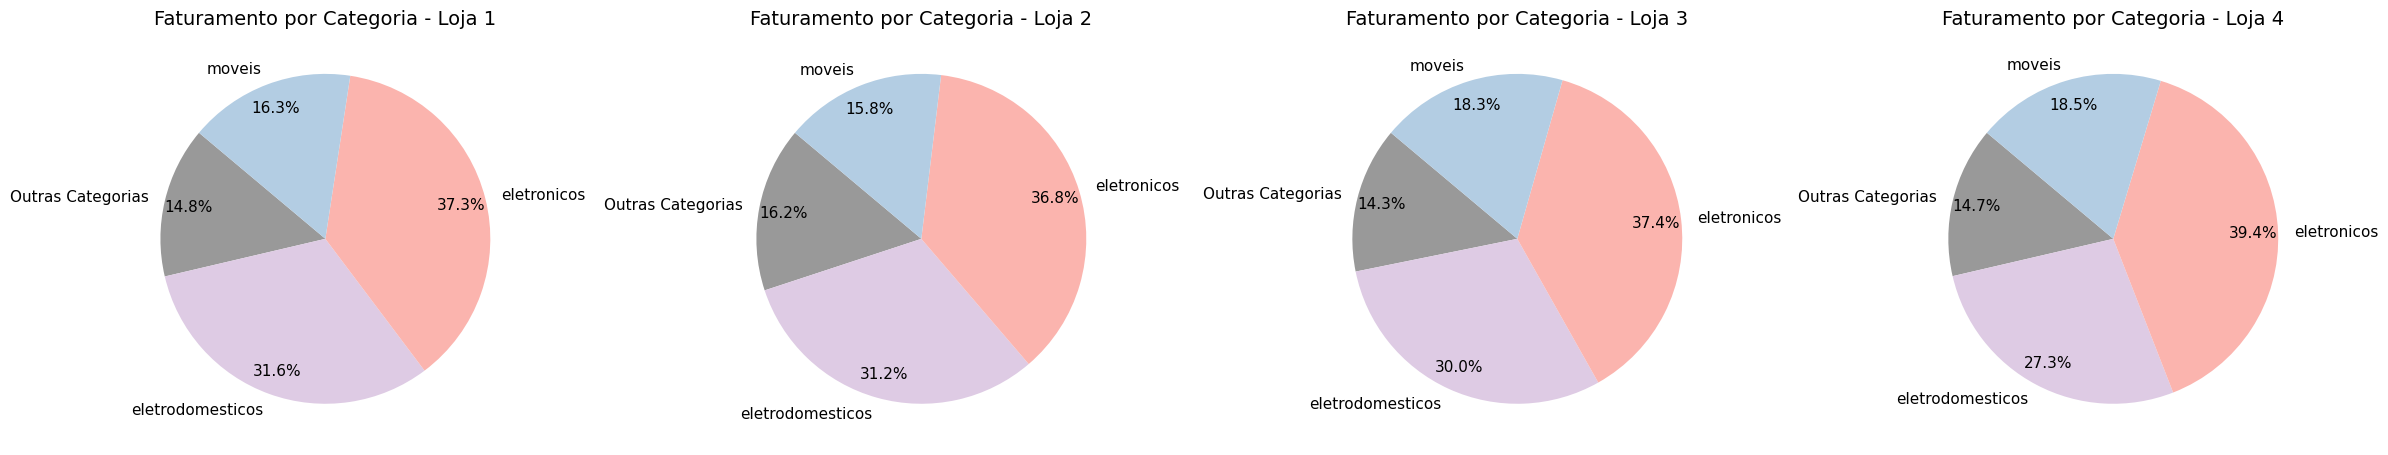

In [59]:
""" Gráfico de Pizza - Faturamento por Categoria com 'Outras Categorias' """

# Criar a figura com subplots (ajustando tamanho dinamicamente)
fig, axes = plt.subplots(1, num_lojas, figsize=(6 * num_lojas, 6))

# Iterar sobre cada loja e criar o gráfico de pizza correspondente
for idx, loja in enumerate(df_group_cat['loja'].unique()):
    df_aux = df_group_cat[df_group_cat['loja'] == loja].copy()
    df_aux = df_aux.sort_values('valor_total', ascending=False)

    # Calcular a participação percentual de cada categoria
    df_aux['percentual'] = df_aux['valor_total'] / df_aux['valor_total'].sum()

    # Agrupar categorias abaixo de 5% em "Outras Categorias"
    df_aux.loc[df_aux['percentual'] < 0.1, 'Categoria do Produto'] = 'Outras Categorias'

    # Agrupar os valores novamente para somar "Outras Categorias"
    df_aux = df_aux.groupby('Categoria do Produto', as_index=False).sum()

    colors = [cor_categoria.get(categoria, '#999999') for categoria in df_aux['Categoria do Produto']]

    axes[idx].pie(
        df_aux['valor_total'], labels=df_aux['Categoria do Produto'], autopct='%1.1f%%',
        colors=colors, startangle=140, pctdistance=0.85, 
        textprops={'fontsize': 11}  # Ajuste o valor conforme necessário
    )

    axes[idx].set_title(f'Faturamento por Categoria - Loja {loja}', size=fontsize_titulo)

plt.tight_layout()
plt.show()

OBSERVAÇÕES

- Padrão Geral: Em todas as lojas, a categoria eletrônicos representa a maior fatia do faturamento, variando entre 36.8% e 39.4%. Isso sugere que produtos eletrônicos têm alta demanda e contribuem significativamente para a receita.

Diferenciação entre lojas:
- Loja 1 e Loja 2: Apresentam distribuições muito similares, indicando que podem ter estratégias de venda semelhantes ou operar em mercados parecidos.
- Loja 3 e Loja 4: Também mostram padrões semelhantes, porém com uma participação ligeiramente maior da categoria móveis, especialmente na Loja 4.
- Impacto das "Outras Categorias": A fração de faturamento atribuída a Outras Categorias é relativamente pequena em todas as lojas (entre 14.3% e 16.2%), indicando que a maioria das receitas provém dos principais produtos (móveis, eletrônicos e eletrodomésticos).

Possíveis Estratégias:
- Se a loja deseja aumentar a participação de uma categoria específica, pode investir em marketing direcionado ou promoções para esses produtos.
- A Loja 4, com menor participação de eletrodomésticos, poderia explorar estratégias para impulsionar essa categoria e equilibrar o mix de faturamento.
Em resumo, a predominância de eletrônicos é clara, mas cada loja apresenta variações sutis que podem indicar diferentes estratégias e perfis de clientes

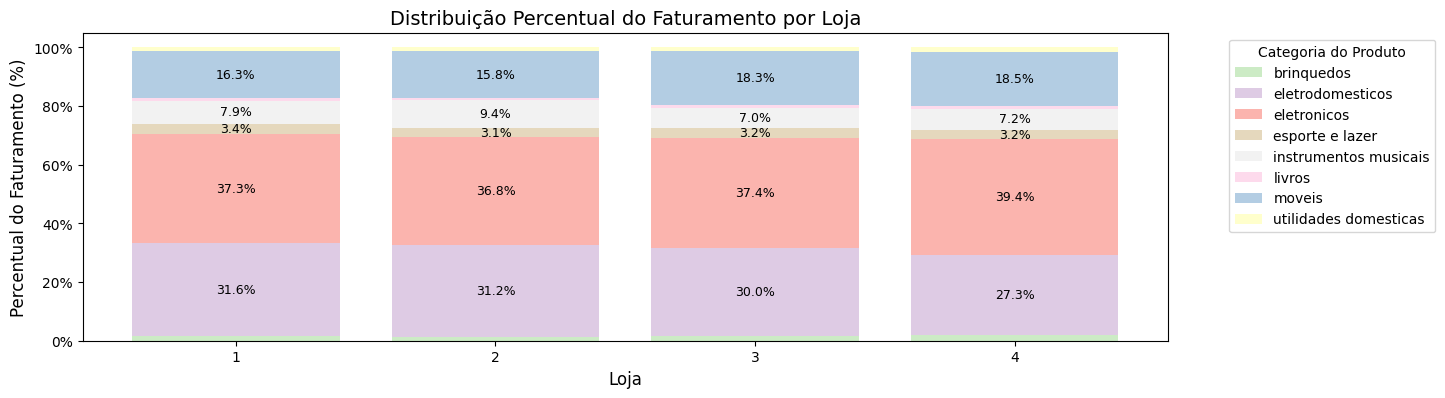

In [62]:

# Transformar os valores em percentuais
df_group_cat['percentual'] = df_group_cat.groupby('loja')['valor_total'].transform(lambda x: x / x.sum() * 100)
df_pivot = df_group_cat.pivot(index='loja', columns='Categoria do Produto', values='percentual')

bar_width = 0.8
x = np.arange(len(df_pivot.index))  # Posições no eixo x

plt.figure(figsize=(14, 4))
bottom = np.zeros(len(df_pivot.index))  # Inicializador para empilhamento

# Iterar sobre as categorias e empilhar as barras
for categoria in df_pivot.columns:
    bars = plt.bar(x, df_pivot[categoria], width=bar_width, label=categoria, bottom=bottom, color=cor_categoria[categoria])
    
    # Adicionar rótulos diretamente nas barras
    for bar in bars:
        height = bar.get_height()
        if height > 2:  # Exibir apenas valores significativos
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, f'{height:.1f}%', 
                     ha='center', va='center', fontsize=9, color='black')

    bottom += df_pivot[categoria].fillna(0)  # Atualizar posição para empilhamento

plt.xticks(x, df_pivot.index)
plt.title('Distribuição Percentual do Faturamento por Loja', size=fontsize_titulo)
plt.xlabel('Loja', size=fontsize_eixos)
plt.ylabel('Percentual do Faturamento (%)', size=fontsize_eixos)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.0f}%'))  # Formatar eixo y como percentual

plt.legend(title='Categoria do Produto', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

- Predominância dos Eletrônicos e Eletrodomésticos: Essas categorias representam as maiores fatias do faturamento em todas as lojas, com Eletrônicos chegando a 37.3% na Loja 1 e Eletrodomésticos atingindo 31.6%. Isso indica uma forte demanda por esses produtos e sua relevância para o faturamento total.

Variações entre lojas:
- Loja 1: Foco maior em Eletrônicos e Eletrodomésticos, representando juntas quase 70% do faturamento.
- Loja 2: Distribuição semelhante à Loja 1, mas com uma participação um pouco menor de eletrônicos (35.4%).
- Loja 3: A categoria Móveis tem um peso maior (19.1%), indicando um posicionamento diferente.
- Loja 4: Apresenta a menor participação percentual dos Eletrônicos e maior destaque para Móveis e Utilidades Domésticas.

Influência das Estratégias e Mercado:
- A distribuição sugere que as lojas podem estar atendendo públicos distintos ou adotando estratégias diferenciadas para cada segmento.
- A presença significativa de "Outras Categorias" pode indicar nichos de mercado não tão expressivos, mas que contribuem para a diversidade do portfólio.
De modo geral, o gráfico revela que Eletrônicos e Eletrodomésticos dominam as vendas, mas há diferenças entre as lojas no mix de produtos.


RESUMO

- Eletrônicos dominam o faturamento: Em todas as lojas, essa categoria representa a maior fatia da receita, variando entre 36.8% e 39.4%, indicando alta demanda.
- Distribuição semelhante entre Loja 1 e Loja 2: Ambas têm padrões parecidos de faturamento, sugerindo estratégias similares ou mercados parecidos.
- Loja 3 e Loja 4 têm diferenças no mix de produtos: A participação da categoria Móveis é mais expressiva, especialmente na Loja 4.
- Impacto das "Outras Categorias": Elas representam 14.3% a 16.2% do faturamento, reforçando que a maior parte da receita vem de produtos principais (Eletrônicos, Eletrodomésticos e Móveis).

Estratégias possíveis:
- Investir em marketing para aumentar a participação de categorias menos expressivas.
- Loja 4 pode explorar promoções e ajustes estratégicos para impulsionar vendas de eletrodomésticos.

De modo geral, Eletrônicos e Eletrodomésticos dominam, mas há diferenças entre lojas no mix de produtos, refletindo possíveis estratégias e perfis de clientes.


# 3. Média de Avaliação das Lojas

In [63]:
# Calculando a média de avaliação por loja
df_group_avaliacao = df.groupby('loja')['Avaliação da compra'].mean().reset_index()

# Criar uma cópia do dataframe
df_avaliacao = df.copy()
df_avaliacao['Data da Compra'] = pd.to_datetime(df_avaliacao['Data da Compra'], format='%d/%m/%Y')
df_avaliacao['Ano'] = df_avaliacao['Data da Compra'].dt.year  
df_avaliacao['Mes_Ano'] = df_avaliacao['Data da Compra'].dt.to_period('M')

# Agrupar por Ano e Loja, calculando a média das avaliações
df_avaliacao_ano = df_avaliacao.groupby(['Ano', 'loja'])['Avaliação da compra'].mean().reset_index()
df_avaliacao_ano['Ano'] = df_avaliacao_ano['Ano'].astype(str)  

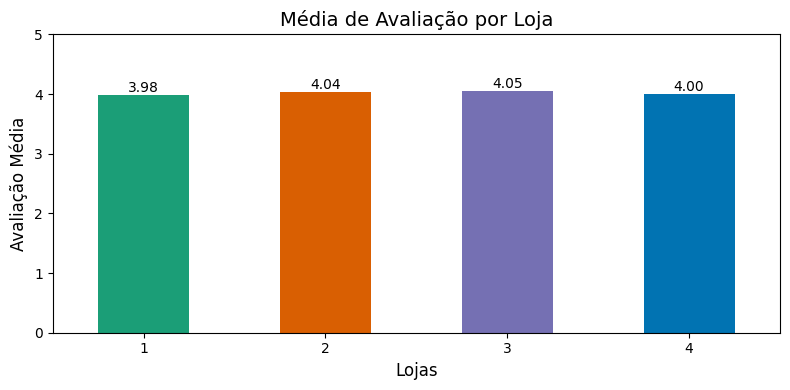

In [64]:

fig, ax = plt.subplots(figsize=(8, 4))  # Alterado para um tamanho maior

# Criando gráfico de barras para média de avaliação
ax = df_group_avaliacao.plot(
    x='loja', y='Avaliação da compra', kind='bar', ax=ax, 
    title='Média de Avaliação por Loja', legend=False, color=cores_paleta_lojas
)

# Adicionando rótulos sobre as barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}', 
        (p.get_x() + p.get_width() / 2, min(p.get_height(), 5)), 
        ha='center', va='bottom', fontsize=10, color='black',
    )

plt.ylim(0, 5)
plt.title('Média de Avaliação por Loja', fontsize=fontsize_titulo)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Lojas', fontsize=fontsize_eixos)
plt.ylabel('Avaliação Média', fontsize=fontsize_eixos)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

- Este gráfico apresenta a média de avaliação por loja, destacando a satisfação dos clientes com quatro lojas diferentes. Os valores variam entre 3,98 e 4,05, sugerindo que todas as lojas possuem avaliações relativamente próximas, indicando um nível consistente de qualidade percebida pelos consumidores.
- A Loja 3 tem a maior média de avaliação (4,05), o que pode sugerir um melhor atendimento ou produtos mais bem avaliados. Por outro lado, a Loja 1 apresenta a menor média (3,98), mas a diferença é pequena, indicando que nenhuma loja tem uma avaliação significativamente pior que as outras


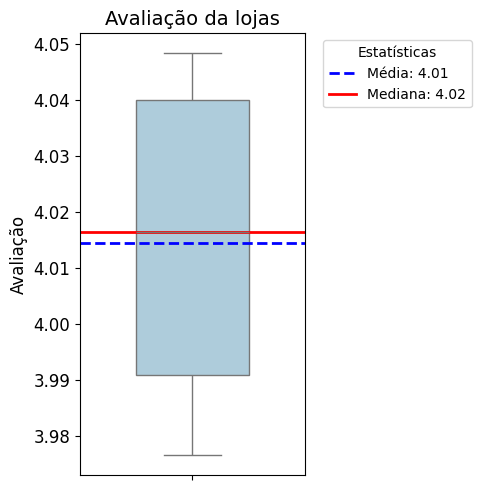

In [273]:
plt.figure(figsize=(5, 5))  
sns.boxplot(y=df_group_avaliacao['Avaliação da compra'], color='#A6CEE3', width=0.5)  

# Calcular média e mediana
media = df_group_avaliacao['Avaliação da compra'].mean()
mediana = df_group_avaliacao['Avaliação da compra'].median()

# Adicionar linhas para média e mediana com maior destaque
plt.axhline(media, color='blue', linestyle='--', linewidth=2, label=f'Média: {media:.2f}')
plt.axhline(mediana, color='red', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')

plt.title('Avaliação da lojas', fontsize=fontsize_titulo)
plt.ylabel('Avaliação', fontsize=12)
plt.xticks(fontsize=fontsize_eixos)
plt.yticks(fontsize=fontsize_eixos)

plt.legend(title='Estatísticas', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

OBSERVAÇÕES

 - Como os valores são próximos, isso sugere que os dados são relativamente simétricos, sem grandes assimetrias na distribuição.

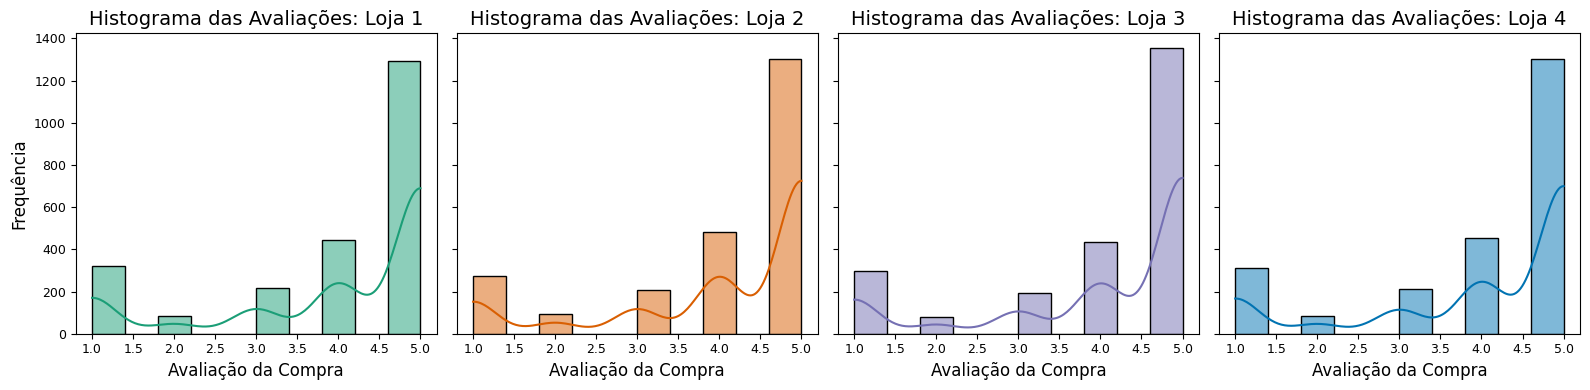

In [65]:
fig, axes = plt.subplots(1, num_lojas, figsize=(4 * num_lojas, 4), sharex=True, sharey=True)

# Criando histogramas lado a lado por loja
for idx, loja in enumerate(df['loja'].unique()):
    df_aux = df[df['loja'] == loja]

    sns.histplot(df_aux['Avaliação da compra'], bins=10, kde=True, ax=axes[idx], color=cores_paleta_lojas[idx])

    axes[idx].set_title(f'Histograma das Avaliações: Loja {loja}', fontsize=fontsize_titulo)
    axes[idx].set_xlabel("Avaliação da Compra", fontsize=fontsize_eixos)
    axes[idx].set_ylabel("Frequência", fontsize=fontsize_eixos)
    axes[idx].tick_params(axis='both', labelsize=9)

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

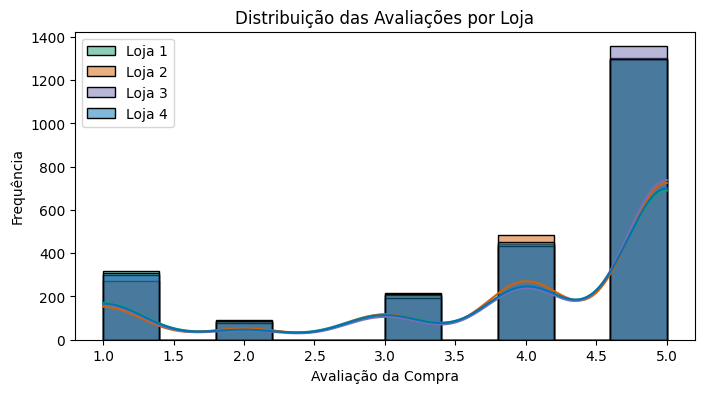

In [83]:
# Criando o histograma sobreposto
plt.figure(figsize=(8, 4))

for idx, loja in enumerate(df['loja'].unique()):
    sns.histplot(df[df['loja'] == loja]['Avaliação da compra'], bins=10, kde=True, 
                 label=f'Loja {loja}', alpha=0.5, color=cores_paleta_lojas[idx])

plt.xlabel("Avaliação da Compra")
plt.ylabel("Frequência")
plt.title("Distribuição das Avaliações por Loja")
plt.legend()
plt.show()


OBSERVAÇÕES
- Distribuição das avaliações: A maior frequência de avaliações ocorre na nota 5.0, indicando que a maioria dos clientes avaliou suas compras como excelentes.
- Diferenças entre lojas: A loja 4 (representada em azul) teve o maior número de avaliações na nota 5.0, sugerindo que esta loja possui um desempenho mais favorável em comparação às demais.
- Tendência geral: As avaliações menores (1.0 e 2.0) têm uma frequência muito baixa, o que pode indicar que a experiência de compra na maioria das lojas é predominantemente positiva.

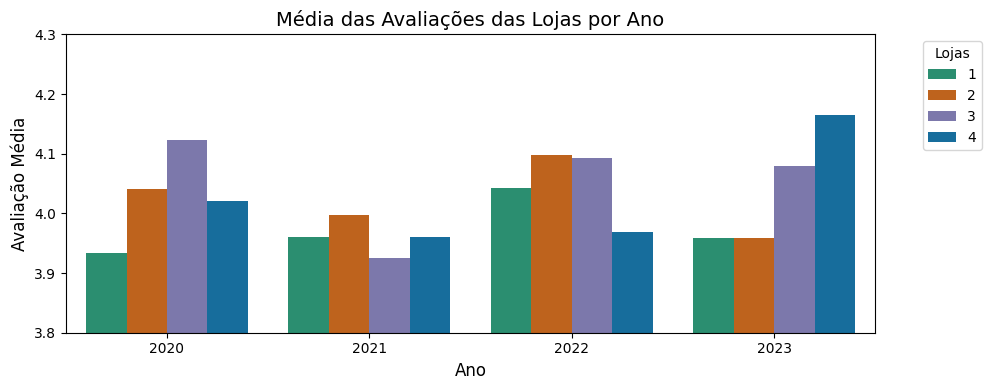

In [84]:
plt.figure(figsize=(10, 4))

# Criando gráfico de barras por loja
sns.barplot(x='Ano', y='Avaliação da compra', hue='loja', data=df_avaliacao_ano, palette=cores_paleta_lojas)

# Adicionar título e rótulos
plt.title('Média das Avaliações das Lojas por Ano', fontsize=fontsize_titulo)
plt.xlabel('Ano', fontsize=fontsize_eixos)
plt.ylabel('Avaliação Média', fontsize=fontsize_eixos)
plt.xticks( fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.ylim(3.8,4.3)
plt.tight_layout()
plt.show()

OBSERVAÇÃO
- Variação das avaliações ao longo dos anos: As médias variam entre aproximadamente 3.8 e 4.3, indicando que todas as lojas tiveram um desempenho relativamente estável, sem grandes flutuações extremas.
- Melhor desempenho recente: A loja 4 (azul) alcançou a maior média de avaliação em 2023, sugerindo uma possível melhoria na satisfação dos clientes ao longo dos anos.
- Desempenho da loja 3: Em 2020, a loja 3 (roxa) teve a melhor média, mas ao longo dos anos foi superada por outras lojas.
- Comparação entre lojas: Cada loja tem sua própria trajetória ao longo dos anos, o que pode refletir mudanças na qualidade do serviço, estratégias comerciais ou outros fatores internos.

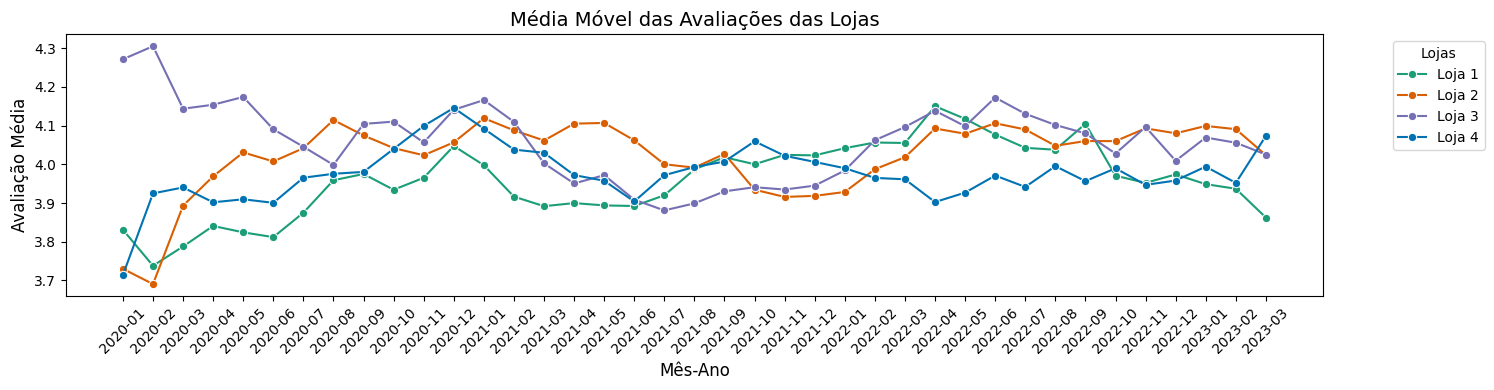

In [72]:
df_time = df_avaliacao.groupby(['Mes_Ano', 'loja'])['Avaliação da compra'].mean().reset_index()
df_time['Media_Movel'] = df_time.groupby('loja')['Avaliação da compra'].transform(lambda x: x.rolling(window=6, min_periods=1).mean())
df_time['Mes_Ano'] = df_time['Mes_Ano'].astype(str)

plt.figure(figsize=(15, 4))

# Iterar sobre as lojas e aplicar as cores corretamente
for idx, loja in enumerate(df_time['loja'].unique()):
    df_aux = df_time[df_time['loja'] == loja]
    sns.lineplot(x='Mes_Ano', y='Media_Movel', data=df_aux, marker='o', 
                 color=cores_paleta_lojas[idx % len(cores_paleta_lojas)], label=f'Loja {loja}')

# Melhorar título e rótulos
plt.title('Média Móvel das Avaliações das Lojas', fontsize=fontsize_titulo)
plt.xlabel('Mês-Ano', fontsize=fontsize_eixos)
plt.ylabel('Avaliação Média', fontsize=fontsize_eixos)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

OBSERVAÇÕES
- Variação das avaliações ao longo dos anos: As médias variam entre aproximadamente 3.8 e 4.3, indicando que todas as lojas tiveram um desempenho relativamente estável, sem grandes flutuações extremas.
- Melhor desempenho recente: A loja 4 (azul) alcançou a maior média de avaliação em 2023, sugerindo uma possível melhoria na satisfação dos clientes ao longo dos anos.
- Desempenho da loja 3: Em 2020, a loja 3 (roxa) teve a melhor média, mas ao longo dos anos foi superada por outras lojas.
- Comparação entre lojas: Cada loja tem sua própria trajetória ao longo dos anos, o que pode refletir mudanças na qualidade do serviço, estratégias comerciais ou outros fatores internos.


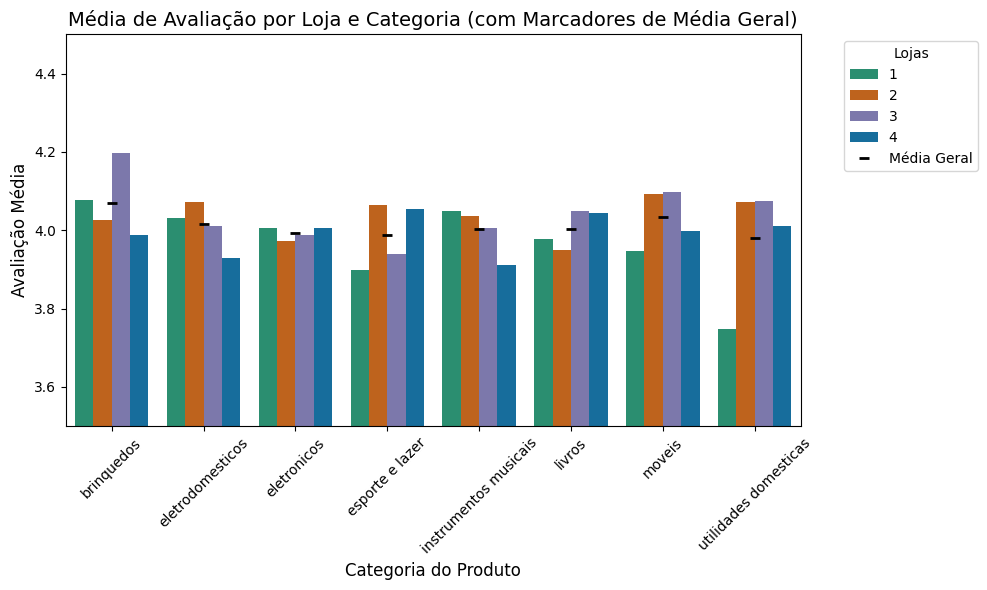

In [73]:

df_media = df.groupby(['loja', 'Categoria do Produto'])['Avaliação da compra'].mean().reset_index()
df_media_geral = df.groupby('Categoria do Produto')['Avaliação da compra'].mean().reset_index()

plt.figure(figsize=(10, 6))

# Plotar as médias individuais das lojas por categoria com a paleta personalizada
sns.barplot(x='Categoria do Produto', y='Avaliação da compra', hue='loja', data=df_media, palette=cores_paleta_lojas)

# Adicionar apenas os marcadores da média geral por categoria
sns.pointplot(x='Categoria do Produto', y='Avaliação da compra', data=df_media_geral, 
    color='black', markers='_', linestyles="",  label='Média Geral'
)

# Melhorar título e rótulos
plt.title('Média de Avaliação por Loja e Categoria (com Marcadores de Média Geral)', fontsize=fontsize_titulo)
plt.xlabel('Categoria do Produto', fontsize=fontsize_eixos)
plt.ylabel('Avaliação Média', fontsize=fontsize_eixos)
plt.xticks(rotation=45)
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.ylim(3.5, 4.5)
plt.tight_layout()
plt.show()

OBSERVAÇÕES
- Diferenças entre categorias: Algumas categorias, como livros e instrumentos musicais, possuem médias mais altas, indicando que os clientes costumam avaliar esses produtos de forma mais positiva.
- Variação entre lojas: A loja 4 (azul) tem consistentemente médias mais altas em várias categorias, sugerindo um desempenho favorável na percepção dos clientes.
- Impacto da média geral: A linha preta marca a média geral das avaliações para cada categoria, permitindo comparar o desempenho de cada loja em relação ao padrão geral.


# 4. Produtos Mais e Menos Vendidos

In [145]:
#produtos mais vendidos (R$)
df_group_p = df.copy()
df_group_p['Produto'] = df_group_p['Categoria do Produto'] + " | "+ df_group_p['Produto'] 
df_group_p = df_group_p.groupby(['Produto','Categoria do Produto']).agg(qtd=('Produto', 'count'), valor=('Preço', 'sum')).reset_index()
df_group_p = df_group_p.sort_values('valor',ascending=False).reset_index(drop=True)
df_group_p['percent'] = df_group_p['valor']/df_group_p['valor'].sum()*100
df_group_p['cumsum'] = df_group_p['percent'].cumsum()     
df_group_p.head(5)                        

,Produto,Categoria do Produto,qtd,valor,percent,cumsum
0,eletronicos | TV Led UHD 4K,eletronicos,187,576652.70,9.82,9.82
1,eletronicos | Celular Plus X42,eletronicos,198,534735.14,9.11,18.93
2,eletrodomesticos | Geladeira,eletrodomesticos,191,513249.34,8.74,27.67
3,eletronicos | Smart TV,eletronicos,192,386963.12,6.59,34.26
4,eletrodomesticos | Lavadora de roupas,eletrodomesticos,176,323292.37,5.51,39.77


In [146]:
#produtos menos vendidos (R$)
df_group_p.tail(5)      

,Produto,Categoria do Produto,qtd,valor,percent,cumsum
46,utilidades domesticas | Jogo de copos,utilidades domesticas,169,7445.28,0.13,99.68
47,brinquedos | Xadrez de madeira,brinquedos,180,6865.90,0.12,99.80
48,brinquedos | Dinossauro Rex,brinquedos,175,4150.53,0.07,99.87
49,esporte e lazer | Corda de pular,esporte e lazer,186,4090.93,0.07,99.94
50,brinquedos | Cubo mágico 8x8,brinquedos,180,3638.68,0.06,100.00


OBSERVAÇÕES

Produtos maior faturamento:
- Os produtos eletrônicos dominam as vendas, com destaque para TVs e celulares.
- O acumulado dos cinco principais produtos representa quase 40% do valor total das vendas.
- A categoria de eletrodomésticos também se mostra forte com geladeiras e lavadoras.

Produtos menor faturamento:
- Os produtos de utilidades domésticas e brinquedos aparecem como os menos vendidos em termos de receita.
- Apesar de suas quantidades serem relativamente próximas dos mais vendidos, os valores são muito menores.
- O impacto desses produtos nas vendas totais é quase insignificante, representando apenas frações do percentual total.


In [137]:
#produtos mais vendidos (quantidade)
df_group_q = df_group_p.sort_values('qtd',ascending=False).reset_index(drop=True)
df_group_q['percent_qtd'] = df_group_q['qtd']/df_group_q['qtd'].sum()*100
df_group_q['cumsum_qtd'] = df_group_q['percent_qtd'].cumsum()     
df_group_q.head(5)      

,Produto,Categoria do Produto,qtd,valor,percent,cumsum,percent_qtd,cumsum_qtd
0,moveis | Cômoda,moveis,210,77892.33,1.33,42.23,2.23,2.23
1,brinquedos | Carrinho controle remoto,brinquedos,206,19690.62,0.34,66.80,2.18,4.41
2,eletrodomesticos | Micro-ondas,eletrodomesticos,206,154267.24,2.63,29.81,2.18,6.59
3,instrumentos musicais | Bateria,instrumentos musicais,203,197074.45,3.36,19.84,2.15,8.74
4,moveis | Cama king,moveis,201,181040.36,3.08,21.97,2.13,10.87


In [ ]:
#produtos menos vendidos (quantidade)
df_group_q.tail(5)   

,Produto,Categoria do Produto,qtd,valor,percent,cumsum,percent_qtd,cumsum_qtd
46,livros | Ciência de dados com python,livros,166,12049.06,0.21,80.70,1.76,93.18
47,instrumentos musicais | Guitarra,instrumentos musicais,165,172539.87,2.94,25.70,1.75,94.93
48,esporte e lazer | Mochila,esporte e lazer,163,21421.54,0.36,64.62,1.73,96.66
49,eletronicos | Headset,eletronicos,158,30330.90,0.52,61.05,1.67,98.34
50,eletronicos | Celular ABXY,eletronicos,157,210547.77,3.59,17.69,1.66,100.00


OBSERVAÇÕES
- Produtos com alta quantidade vendida: Os itens mais vendidos incluem Blocos de montar (56 unidades), Bola de basquete (55 unidades) e Bicicleta (54 unidades). Isso pode indicar uma alta demanda por brinquedos e itens esportivos.
- Produtos de alto valor total: O TV Led UHD 4K teve um valor total de 120.393,25, o mais alto da lista, apesar de ter apenas 40 unidades vendidas. Isso sugere um ticket médio alto para produtos eletrônicos.
- Distribuição das vendas: Alguns produtos, como Violão (37 unidades) e Xadrez de madeira (39 unidades), têm vendas mais baixas em comparação com os itens de maior quantidade, indicando um nicho de mercado mais restrito.
- Relação entre quantidade e valor: Produtos como Tablet ABXY (45 unidades e 75.630,75 em valor total) mostram que a receita gerada não depende apenas da quantidade vendida, mas do preço unitário do produto.


In [140]:
# Agrupar por loja e produto, somando o valor
df_group = df.groupby(['loja', 'Produto'])['Preço'].sum().reset_index()

# Ordenar os valores dentro de cada loja e selecionar os top 5
df_top5 = df_group.groupby('loja').apply(lambda x: x.nlargest(5, 'Preço')).reset_index(drop=True)
df_top5['Rank'] = df_top5.groupby('loja').cumcount() + 1
df_top5


,loja,Produto,Preço,Rank
0,1,TV Led UHD 4K,189534.28,1
1,1,Geladeira,149524.28,2
2,1,Celular Plus X42,130536.40,3
3,1,Smart TV,89936.15,4
4,1,Lavadora de roupas,87711.30,5
5,2,Celular Plus X42,150967.83,1
6,2,TV Led UHD 4K,137833.06,2
7,2,Geladeira,130176.48,3
8,2,Lavadora de roupas,89016.81,4
9,2,Smart TV,81522.94,5


In [141]:
# produtos que mais faturam no top 5 de cada loja
df_top5['Produto'].value_counts()

Produto
TV Led UHD 4K         4
Geladeira             4
Celular Plus X42      4
Smart TV              4
Lavadora de roupas    2
Lava louças           1
Tablet ABXY           1
Name: count, dtype: int64

OBSERVAÇÕES
- Produtos de alto valor – Itens como "TV Led UHD 4K", "Celular Plus X42" e "Geladeira" aparecem entre os mais caros em várias lojas, sugerindo uma alta demanda e margem de preço significativa


In [142]:
# Agrupar por loja e produto, somando o valor
df_group = df.groupby(['loja', 'Produto'])['Preço'].count().reset_index()
df_group.rename(columns={'Preço':'quantidade'}, inplace=True)

# Ordenar os valores dentro de cada loja e selecionar os top 5
df_top5 = df_group.groupby('loja').apply(lambda x: x.nlargest(5, 'quantidade')).reset_index(drop=True)
df_top5['Rank'] = df_top5.groupby('loja').cumcount() + 1

df_top5

,loja,Produto,quantidade,Rank
0,1,Guarda roupas,60,1
1,1,Micro-ondas,60,2
2,1,TV Led UHD 4K,60,3
3,1,Secadora de roupas,58,4
4,1,Blocos de montar,56,5
5,2,Iniciando em programação,65,1
6,2,Micro-ondas,62,2
7,2,Bateria,61,3
8,2,Pandeiro,58,4
9,2,Violão,58,5


In [143]:
# produtos que mais vendem (em quantidade) no top 5 de cada loja
df_top5['Produto'].value_counts()

Produto
Micro-ondas                 2
Cama king                   2
Guarda roupas               1
Dashboards com Power BI     1
Faqueiro                    1
Cama box                    1
Jogo de panelas             1
Cômoda                      1
Mesa de jantar              1
Kit banquetas               1
Violão                      1
Pandeiro                    1
Bateria                     1
Iniciando em programação    1
Blocos de montar            1
Secadora de roupas          1
TV Led UHD 4K               1
Carrinho controle remoto    1
Name: count, dtype: int64

OBSERVAÇÕES
- Maior diversidade em produtos menos vendidos

C:\Users\emili\AppData\Local\Temp\ipykernel_12540\1721269593.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)


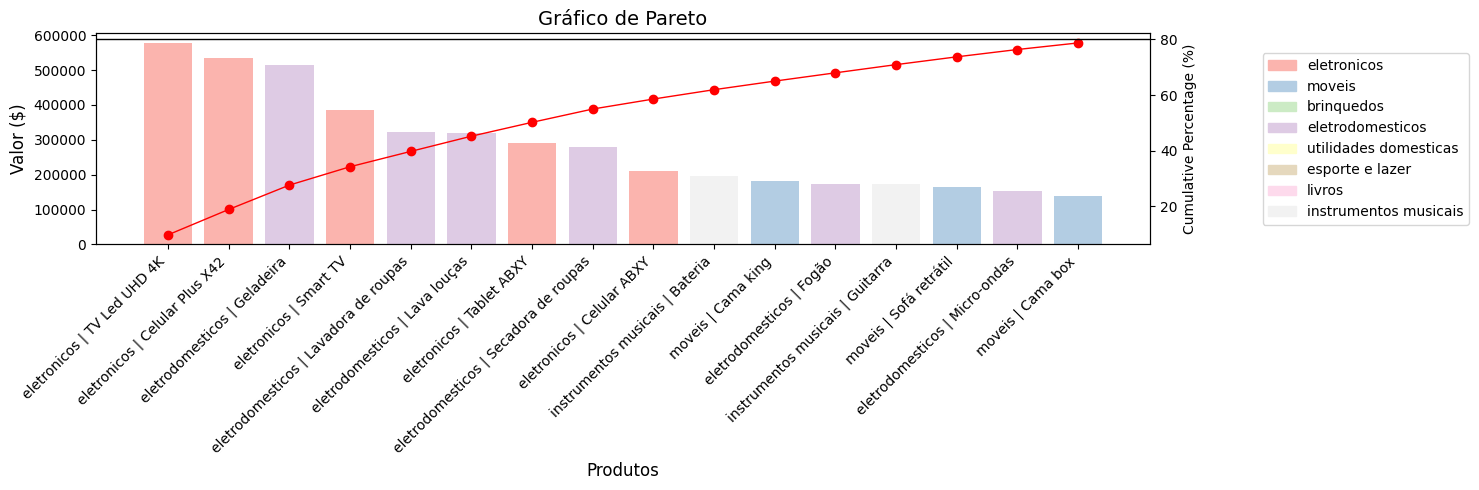

In [147]:
df_aux = df_group_p[df_group_p['cumsum'] < 80].sort_values(by='valor', ascending=False)

fig, ax = plt.subplots(figsize=(15, 5))

# Definir as cores das barras com base na categoria do produto
colors = [cor_categoria.get(produto, '#999999') for produto in df_aux['Categoria do Produto']]

ax.bar(df_aux['Produto'], df_aux['valor'], color=colors)

# Criar um eixo secundário para a curva de Pareto
ax2 = ax.twinx()
ax2.plot(df_aux['Produto'], df_aux['cumsum'], color='red', marker='o', linestyle='-', linewidth=1)

# Adicionar uma linha horizontal preta em 80%
ax2.axhline(y=80, color='black', linestyle='-', linewidth=1)

ax.set_xlabel('Produtos', size=fontsize_eixos)
ax.set_ylabel('Valor ($)', size=fontsize_eixos)
ax2.set_ylabel('Cumulative Percentage (%)')
plt.title('Gráfico de Pareto', fontsize=fontsize_titulo)

# Criar a legenda das cores
legend_patches = [mpatches.Patch(color=cores_paleta[idx], label=categoria) 
                  for idx, categoria in enumerate(categorias_unicas)]

ax.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

OBSERVAÇÕES
- Os primeiros produtos na lista são os que mais contribuem para o valor total. Esses itens são os campeões de vendas e merecem atenção especial. Assim, lojas que vendem esses produtos podem faturar mais
- As categorias que mais aparecem são eletronicos e eletrodomesticos

RESUMO

Produtos de maior faturamento:
- Eletrônicos lideram as vendas, com destaque para TVs e celulares.
- Os cinco principais produtos representam quase 40% do total vendido.
- Eletrodomésticos como geladeiras e lavadoras também têm forte presença.

Produtos de menor faturamento:
- Utilidades domésticas e brinquedos geram pouca receita.
- Quantidade vendida próxima aos líderes, mas com valores unitários baixos.
- Impacto nas vendas totais é quase insignificante.

Tendências de vendas:
- Itens mais vendidos em unidades incluem Blocos de montar, Bola de basquete e Bicicleta, sugerindo demanda por brinquedos e artigos esportivos.
- TV Led UHD 4K teve o maior faturamento (120.393,25) apesar de apenas 40 unidades vendidas, indicando alto ticket médio.
- Produtos como Violão e Xadrez de madeira têm vendas mais baixas, evidenciando nichos restritos.
- Tablet ABXY mostra que faturamento depende tanto da quantidade vendida quanto do preço unitário.

Produtos de alto valor:
- Itens como TV Led UHD 4K, Celular Plus X42 e Geladeira são os mais caros, sugerindo forte demanda e margem significativa.

Distribuição das vendas:
- Maior diversidade entre produtos menos vendidos (analisando quantidade de itens vendidos).
- Os líderes de vendas são essenciais para o faturamento das lojas.
- Eletrônicos e eletrodomésticos são as categorias predominantes.


# 5. Frete Médio por Loja


In [226]:
df.groupby(['loja']).agg(frete_medio=('Frete', 'mean')).reset_index().sort_values('frete_medio', ascending=False)

,loja,frete_medio
0,1,34.691805
1,2,33.621941
2,3,33.074464
3,4,31.278997


OBSERVAÇÕES
- Loja 1 tem o maior frete médio (34.69), indicando que os custos de envio são mais elevados comparados às outras lojas.
- Loja 4 possui o menor frete médio (31.27), o que pode significar maior eficiência logística ou estratégias diferenciadas para baratear o frete.
- A diferença entre a loja com o maior e menor frete médio é de aproximadamente 3.41, o que pode ser relevante dependendo do volume de vendas e margens de lucro.
- A tendência dos valores sugere que os custos de frete estão relativamente próximos entre todas as lojas, sem uma disparidade extrema.

In [148]:
# Criar uma cópia do dataframe
df_fat_loja = df.copy()
df_fat_loja['Data da Compra'] = pd.to_datetime(df_fat_loja['Data da Compra'], format='%d/%m/%Y')
df_fat_loja['Mes_Ano'] = df_fat_loja['Data da Compra'].dt.to_period('M')
df_fat_loja['Ano'] = df_fat_loja['Data da Compra'].dt.to_period('Y')

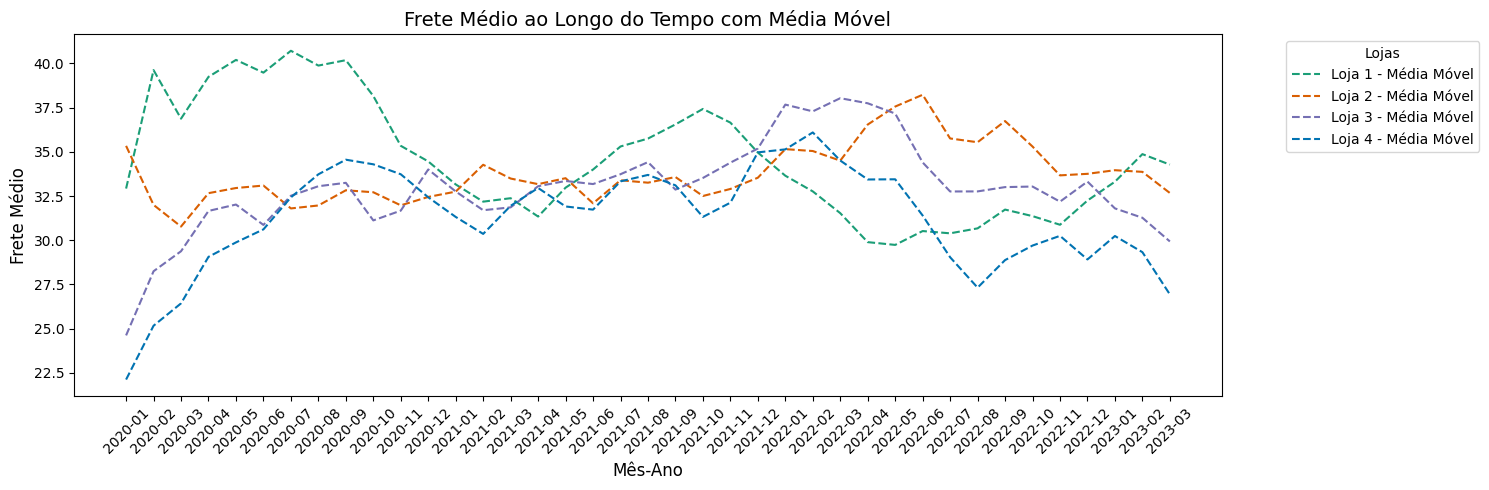

In [149]:
# Agrupar por loja e mês, calculando a média do frete
df_group_fat_loja = df_fat_loja.groupby(['loja', 'Mes_Ano'])['Frete'].mean().reset_index()

plt.figure(figsize=(15, 5))

# Iterar sobre as lojas e aplicar as cores corretamente
for idx, loja in enumerate(df_group_fat_loja['loja'].unique()):
    df_aux = df_group_fat_loja[df_group_fat_loja['loja'] == loja].copy()
    df_aux = df_aux.sort_values('Mes_Ano')
    df_aux.set_index('Mes_Ano', inplace=True)

    # Aplicando média móvel de 6 meses
    df_aux['Frete_MM'] = df_aux['Frete'].rolling(window=6, min_periods=1).mean()

    # Plotar linha da média móvel com cores personalizadas
    plt.plot(df_aux.index.astype(str), df_aux['Frete_MM'], 
             label=f'Loja {loja} - Média Móvel', 
             color=cores_paleta_lojas[idx % len(cores_paleta_lojas)], linestyle='dashed')

# Adicionar título e rótulos
plt.title('Frete Médio ao Longo do Tempo com Média Móvel', fontsize=fontsize_titulo)
plt.xlabel('Mês-Ano', fontsize=fontsize_eixos)
plt.ylabel('Frete Médio', fontsize=fontsize_eixos)
plt.xticks(rotation=45)
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()

OBSERVAÇÕES
- Flutuações nos custos: Todas as lojas apresentam variações significativas ao longo do tempo, o que pode indicar mudanças sazonais, ajustes de política de preços ou variações nas condições do mercado.
- Loja 1 (linha verde): Mostra picos expressivos em alguns períodos, sugerindo que seu frete médio é mais volátil em comparação com as demais.
- Loja 4 (linha azul): Mantém um custo médio de frete mais estável e geralmente abaixo das demais lojas, o que pode indicar maior eficiência logística ou melhores acordos com transportadoras.
- Tendência geral: Embora existam oscilações, a maioria das lojas aparenta seguir um padrão semelhante, o que pode indicar fatores macroeconômicos afetando os custos de frete de forma geral.
- Diferença entre as lojas: A Loja 1 apresenta um custo médio de frete maior em vários períodos, enquanto a Loja 4 se destaca por manter custos menores.


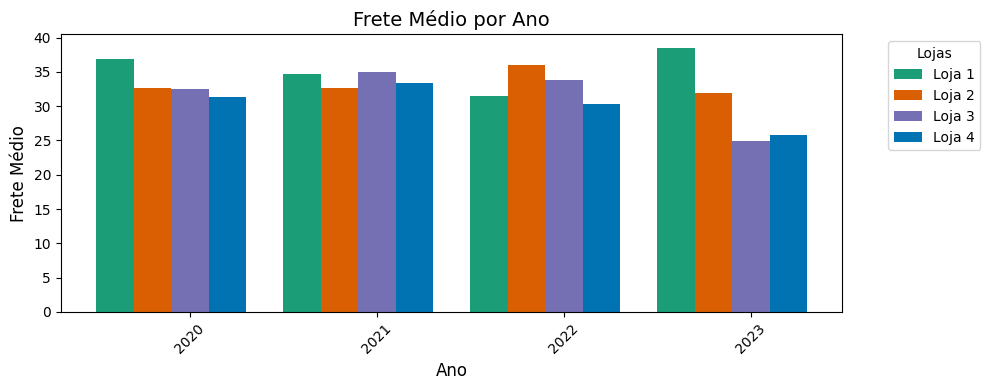

In [150]:
df_group_fat_loja = df_fat_loja.groupby(['loja', 'Ano'])['Frete'].mean().reset_index()
df_pivot = df_group_fat_loja.pivot(index='Ano', columns='loja', values='Frete')

bar_width = 0.2

plt.figure(figsize=(10, 4))

# Definir os anos como eixo X
anos = df_pivot.index.astype(str)
x = np.arange(len(anos))  # Posições no eixo x

# Criando gráfico de barras por loja com paleta personalizada
for idx, loja in enumerate(df_pivot.columns):
    plt.bar(x + idx * bar_width, df_pivot[loja], width=bar_width, 
            label=f'Loja {loja}', color=cores_paleta_lojas[idx % len(cores_paleta_lojas)])

# Ajustar rótulos e título
plt.xticks(x + bar_width * (len(df_pivot.columns) / 2), anos, rotation=45)
plt.title('Frete Médio por Ano', fontsize=fontsize_titulo)
plt.xlabel('Ano', fontsize=fontsize_eixos)
plt.ylabel('Frete Médio', fontsize=fontsize_eixos)
plt.legend(title='Lojas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.ticklabel_format(style='plain', axis='y')  

plt.tight_layout()
plt.show()

OBSERVAÇÕES
- Loja 1 (verde): Apresenta oscilações mais marcantes, sugerindo variações no custo ao longo do tempo.
- Loja 2 (laranja) e Loja 3 (roxo): Seguem padrões semelhantes, com valores próximos em diversos momentos.
- Loja 4 (azul): Destaca-se por manter fretes médios mais baixos de forma consistente, o que pode indicar maior eficiência logística ou melhores acordos com transportadoras.
- Tendência geral: Apesar das flutuações, há momentos em que os custos convergem, sugerindo fatores externos influenciando todas as lojas simultaneamente.
- Diferença entre as lojas: A disparidade nos custos médios pode impactar diretamente a competitividade. Loja 4 pode atrair mais clientes devido aos fretes menores.


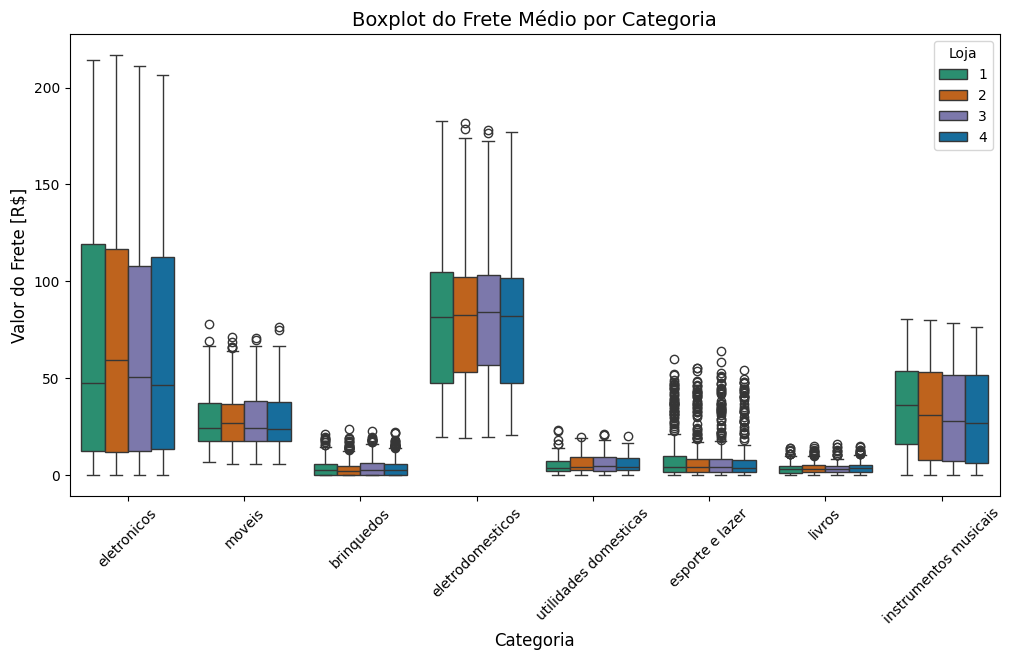

In [153]:
# Agrupar e calcular o frete médio
df_group_frete = df.groupby(['loja', 'Categoria do Produto']).agg(frete_medio=('Frete', 'mean')).reset_index()
df_group_frete = df_group_frete.sort_values(['Categoria do Produto', 'frete_medio'], ascending=[False, False])

plt.figure(figsize=(12, 6))
sns.boxplot(x='Categoria do Produto', y='Frete', data=df, hue='loja', palette=cores_paleta_lojas)

plt.title('Boxplot do Frete Médio por Categoria', fontsize=14)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Valor do Frete [R$]', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Loja")

plt.show()


OBSERVAÇÕES
- Variação entre categorias: Algumas categorias, como eletrônicos e móveis, apresentam maior dispersão nos valores de frete, indicando que os custos podem variar significativamente dependendo da loja.
- Loja com menor frete: A Loja 4 parece ter fretes médios mais baixos em várias categorias, o que pode indicar maior eficiência logística ou melhores acordos com transportadoras.
- Outliers: Algumas categorias possuem valores de frete muito acima da média, o que pode sugerir casos específicos de produtos com custos elevados de envio.
- Impacto na competitividade: Lojas com fretes médios mais baixos podem ter vantagem competitiva, atraindo mais clientes.


RESUMO

- Eletrônicos e eletrodomésticos têm os maiores custos médios de frete, com uma ampla variação e presença de outliers. Isso pode estar relacionado ao peso e dimensões desses produtos.
- Brinquedos, utilidades domésticas, esportes e lazer e livros apresentam custos médios de frete mais baixos, com pouca variabilidade.
- Móveis e instrumentos musicais têm custos moderados, mas com diferenças perceptíveis entre as lojas.
- Há variações significativas entre as lojas para algumas categorias, indicando que determinadas lojas podem ter políticas de frete mais vantajosas para certos tipos de produtos.

A análise dos eletrônicos e eletrodomésticos mostra que essa categoria apresenta os maiores custos médios de frete, com bastante variação entre as lojas. Aqui estão alguns possíveis insights:
- Variação de frete entre lojas: Algumas lojas podem oferecer descontos ou condições especiais para produtos mais pesados, enquanto outras podem repassar totalmente o custo de transporte ao consumidor.
- Impacto do tamanho e peso: Itens como geladeiras, TVs grandes e máquinas de lavar costumam ter fretes mais elevados devido às dimensões e ao manuseio necessário no transporte.
- Possibilidade de retirada em loja: Algumas lojas oferecem a opção de retirada gratuita, o que pode ser uma alternativa viável para evitar custos elevados de frete.
- Frete grátis em compras acima de um valor mínimo: Muitas lojas adotam essa estratégia para incentivar compras maiores, o que pode compensar o custo do envio de eletrônicos.

# Análise Final